In [1]:
import os
import pylab             as pl
import numpy             as np
import astropy.io.fits   as fits
import matplotlib.pyplot as plt

from   astropy.table     import Table, join
from   scipy             import stats

In [5]:
os.chdir('/global/homes/m/mjwilson/sandbox/tsnr-fiberloss/desispec/py/desispec/')

In [3]:
pwd

'/global/u2/m/mjwilson/sandbox/tsnr-fiberloss/desispec/py/desispec'

In [4]:
ls

__init__.py                      fibercrosstalk.py   preproc.py
__pycache__/                     fiberflat.py        qa/
_version.py                      fiberfluxcorr.py    qproc/
averagefluxcalibration.py        fluxcalibration.py  quicklook/
bootcalib.py                     frame.py            resolution.py
calibfinder.py                   heliocentric.py     scatteredlight.py
ccdcalib.py*                     image.py            scripts/
coaddition.py                    image_model.py      sky.py
cosmics.py                       interpolation.py    skymag.py
darktrail.py                     io/                 specscore.py
data/                            joincosmics.py      spectra.py
database/                        linalg.py           test/
desi_bias_dark_1d_model.py       log.py              tilecompleteness.py
desi_create_bias_dark.py         magnitude.py        trace_shifts.py
desi_dashboard.py*               maskbits.py         tsnr.py
desi_proc_dashboard.py*          maskedm

In [5]:
import efftime

In [6]:
def ln_bgsfiberfrac(fwhm):
    return 0.0341 * np.log(fwhm)**3 -0.3611 * np.log(fwhm)**2 -0.7175 * np.log(fwhm) -1.5643

In [7]:
fwhms         = np.arange(0.45, 3.0, 0.05) 
bgsfiberfracs = np.exp(ln_bgsfiberfrac(fwhms))

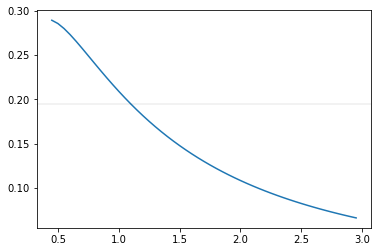

In [8]:
pl.plot(fwhms, bgsfiberfracs)
pl.axhline(0.195, c='k', alpha=1., lw=.1)

In [9]:
for seeing, fiberfrac in zip(fwhms, bgsfiberfracs):
    print('{:.6f}\t{:.6f}'.format(seeing, fiberfrac))

0.450000	0.289681
0.500000	0.285985
0.550000	0.280355
0.600000	0.273472
0.650000	0.265816
0.700000	0.257723
0.750000	0.249428
0.800000	0.241098
0.850000	0.232846
0.900000	0.224753
0.950000	0.216871
1.000000	0.209234
1.050000	0.201864
1.100000	0.194770
1.150000	0.187957
1.200000	0.181425
1.250000	0.175169
1.300000	0.169181
1.350000	0.163454
1.400000	0.157978
1.450000	0.152743
1.500000	0.147738
1.550000	0.142954
1.600000	0.138379
1.650000	0.134005
1.700000	0.129820
1.750000	0.125816
1.800000	0.121983
1.850000	0.118314
1.900000	0.114798
1.950000	0.111430
2.000000	0.108201
2.050000	0.105104
2.100000	0.102132
2.150000	0.099280
2.200000	0.096541
2.250000	0.093910
2.300000	0.091381
2.350000	0.088950
2.400000	0.086611
2.450000	0.084360
2.500000	0.082193
2.550000	0.080107
2.600000	0.078096
2.650000	0.076158
2.700000	0.074289
2.750000	0.072487
2.800000	0.070747
2.850000	0.069068
2.900000	0.067447
2.950000	0.065880


In [10]:
kterm     = 0.114

In [11]:
Xs        = np.arange(1.0, 2.0, 0.05)
airfac    = 10.0 ** (kterm * (Xs - 1.0) / 2.5)

Text(0, 0.5, 'AIRFAC')

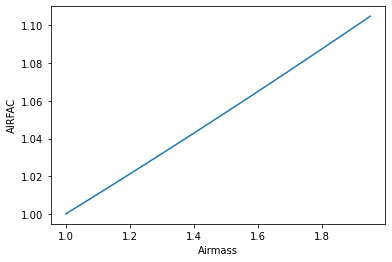

In [12]:
pl.plot(Xs, airfac)

pl.xlabel('Airmass')
pl.ylabel('AIRFAC')

In [13]:
tsnrs         = Table.read('/project/projectdirs/desi/spectro/redux/daily/tsnr-exposures.fits', 'TSNR2_EXPID')

In [14]:
sv1_exposures = Table.read('/global/cfs/cdirs/desi/survey/observations/SV1/sv1-exposures.fits')
sv1_exposures

NIGHT,EXPID,FIELD,TARGETS,OBSCONDITIONS,ARIZONA_TIMEOBS,EBV,SPECMODEL_SKY_GFLUX,SPECMODEL_SKY_RFLUX,SPECMODEL_SKY_ZFLUX,GFA_ORIGIN,B_DEPTH,R_DEPTH,Z_DEPTH,B_DEPTH_EBVAIR,R_DEPTH_EBVAIR,Z_DEPTH_EBVAIR,EFFTIME_DARK,EFFTIME_BRIGHT,EFFTIME_BACKUP,SPEED_DARK,SPEED_BRIGHT,SPEED_BACKUP,SPECPROD,SPECPROD_BITPSFFN,SPECPROD_BITFRAMEFN,SPECPROD_BITSKYFN,SPECPROD_BITSFRAMEFN,SPECPROD_BITFLUXCALIBFN,SPECPROD_BITCFRAMEFN,TSNR2_BGS,TSNR2_LRG,TSNR2_ELG,TSNR2_QSO,TILEID,TILERA,TILEDEC,EXPTIME,MJDOBS,N_ASSGN_TGT,N_ASSGN_SKY,N_ASSGN_STD,N_ASSGN_WD,N_ASSGN_LRG,N_ASSGN_ELG,N_ASSGN_QSO,N_ASSGN_BGS,N_ASSGN_MWS,SKYMON_NEXP,SKYMON_SKYCAM0_MEAN,SKYMON_SKYCAM0_MEAN_ERR,SKYMON_SKYCAM1_MEAN,SKYMON_SKYCAM1_MEAN_ERR,SKYMON_AVERAGE_MEAN,SKYMON_AVERAGE_MEAN_ERR,GFA_AIRMASS,GFA_MOON_ILLUMINATION,GFA_MOON_ZD_DEG,GFA_MOON_SEP_DEG,GFA_TRANSPARENCY,GFA_FWHM_ASEC,GFA_SKY_MAG_AB,GFA_FIBER_FRACFLUX,GFA_FIBER_FRACFLUX_ELG,GFA_FIBER_FRACFLUX_BGS,GFA_TRANSPFRAC,GFA_MAXCONTRAST,GFA_MINCONTRAST,GFA_KTERM,GFA_FRACFLUX_NOMINAL_POINTSOURCE,GFA_FRACFLUX_NOMINAL_ELG,GFA_FRACFLUX_NOMINAL_BGS,GFA_RADPROF_FWHM_ASEC,GFA_FIBERFAC,GFA_FIBERFAC_ELG,EPHEM_NOON,EPHEM_DUSK,EPHEM_DAWN,EPHEM_BRIGHTDUSK,EPHEM_BRIGHTDAWN,EPHEM_BRIGHTDUSK_LST,EPHEM_BRIGHTDAWN_LST,EPHEM_MOONRISE,EPHEM_MOONSET,EPHEM_MOON_ILLUM_FRAC,EPHEM_NEAREST_FULL_MOON
,,,,"1=DARK, 2=GRAY, 4=BRIGHT, -1=ELSE",,,nMgy / arcsec ** 2,nMgy / arcsec ** 2,nMgy / arcsec ** 2,,seconds,seconds,seconds,seconds,seconds,seconds,seconds,seconds,seconds,,,,,,,,,,,,,,,,,,seconds,,,,,,,,,,,,flux units from the database,flux units from the database,flux units from the database,flux units from the database,flux units from the database,flux units from the database,,,,,,,,for an 1.52 arcsecond diameter aperture size,for an 1.52 arcsecond diameter aperture size,for an 1.52 arcsecond diameter aperture size,for an 1.52 arcsecond diameter aperture size,,,,for an 1.52 arcsecond diameter aperture size,for an 1.52 arcsecond diameter aperture size,for an 1.52 arcsecond diameter aperture size,,,,,,,,,,,,,,
int64,int64,bytes30,bytes16,int16,bytes19,float32,float32,float32,float32,bytes13,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes8,int64,int64,int64,int64,int64,int64,float32,float32,float32,float32,int64,float32,float32,float32,float32,int16,int16,int16,int16,int16,int16,int16,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
20201214,67710,XMM-LSS,QSO+LRG,1,2020-12-14T21:12:40,0.026,1.3076847,3.2340524,17.434511,matched_coadd,20.2,18.1,19.5,15.788471,15.534268,17.904373,28.792017,40.904728,17.60517,0.039467085,0.056446712,0.024602938,cascades,1073741823,1073741823,1073741823,1073741823,1073741823,1073741823,144.39601,1.5602673,2.2952428,0.56132203,80605,36.448,-4.601,900.0,59198.176,4200,800,136,13,2117,1341,1428,464,191,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,1.2455698,0.0036080289,133.7576,119.15718,0.8552955,3.5648782,20.274342,0.09934509,0.091754176,0.050551772,0.0849694,4.109576,3.6593802,0.114,0.58176816,0.42423388,0.19544029,3.7471519,0.1318288,0.16755259,59197.791666666664,59198.066745730626,59198.54668876452,59198.05982057322,59198.553616188605,-5.896143626986145,172.35701092094754,59197.59470830986,59198.02745986081,0.005432771706774475,14.852906347514363
20201214,67711,XMM-LSS,QSO+LRG,1,2020-12-14T21:32:32,0.026,1.2771704,3.2320426,17.727564,matched_coadd,17.9,15.9,16.9,13.951611,13.627307,15.504861,25.556372,36.504967,15.584953,0.035094526,0.050449833,0.021801071,cascades,1073741823,1073741823,1073741823,1073741823,1073741823,1073741823,122.741486,1.3224624,1.9237121,0.47375965,80605,36.448,-4.601,900.0,59198.188,4200,800,136,13,2117,1341,1428,464,191,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,1.2533736,0.0038064865,137.79526,118.964

In [15]:
sv1_exposures = join(sv1_exposures, tsnrs['EXPID', 'SKY_MAG_G_SPEC', 'SKY_MAG_R_SPEC', 'SKY_MAG_Z_SPEC', 'TRANSPARENCY_GFA', 'AIRMASS', 'FIBERFAC_GFA', 'FIBERFAC_ELG_GFA', 'FIBERFAC_BGS_GFA', 'FIBER_FRACFLUX_BGS_GFA', 'FIBER_FRACFLUX_GFA'], join_type='left', keys='EXPID')

In [16]:
sv1_exposures

NIGHT,EXPID,FIELD,TARGETS,OBSCONDITIONS,ARIZONA_TIMEOBS,EBV,SPECMODEL_SKY_GFLUX,SPECMODEL_SKY_RFLUX,SPECMODEL_SKY_ZFLUX,GFA_ORIGIN,B_DEPTH,R_DEPTH,Z_DEPTH,B_DEPTH_EBVAIR,R_DEPTH_EBVAIR,Z_DEPTH_EBVAIR,EFFTIME_DARK,EFFTIME_BRIGHT,EFFTIME_BACKUP,SPEED_DARK,SPEED_BRIGHT,SPEED_BACKUP,SPECPROD,SPECPROD_BITPSFFN,SPECPROD_BITFRAMEFN,SPECPROD_BITSKYFN,SPECPROD_BITSFRAMEFN,SPECPROD_BITFLUXCALIBFN,SPECPROD_BITCFRAMEFN,TSNR2_BGS,TSNR2_LRG,TSNR2_ELG,TSNR2_QSO,TILEID,TILERA,TILEDEC,EXPTIME,MJDOBS,N_ASSGN_TGT,N_ASSGN_SKY,N_ASSGN_STD,N_ASSGN_WD,N_ASSGN_LRG,N_ASSGN_ELG,N_ASSGN_QSO,N_ASSGN_BGS,N_ASSGN_MWS,SKYMON_NEXP,SKYMON_SKYCAM0_MEAN,SKYMON_SKYCAM0_MEAN_ERR,SKYMON_SKYCAM1_MEAN,SKYMON_SKYCAM1_MEAN_ERR,SKYMON_AVERAGE_MEAN,SKYMON_AVERAGE_MEAN_ERR,GFA_AIRMASS,GFA_MOON_ILLUMINATION,GFA_MOON_ZD_DEG,GFA_MOON_SEP_DEG,GFA_TRANSPARENCY,GFA_FWHM_ASEC,GFA_SKY_MAG_AB,GFA_FIBER_FRACFLUX,GFA_FIBER_FRACFLUX_ELG,GFA_FIBER_FRACFLUX_BGS,GFA_TRANSPFRAC,GFA_MAXCONTRAST,GFA_MINCONTRAST,GFA_KTERM,GFA_FRACFLUX_NOMINAL_POINTSOURCE,GFA_FRACFLUX_NOMINAL_ELG,GFA_FRACFLUX_NOMINAL_BGS,GFA_RADPROF_FWHM_ASEC,GFA_FIBERFAC,GFA_FIBERFAC_ELG,EPHEM_NOON,EPHEM_DUSK,EPHEM_DAWN,EPHEM_BRIGHTDUSK,EPHEM_BRIGHTDAWN,EPHEM_BRIGHTDUSK_LST,EPHEM_BRIGHTDAWN_LST,EPHEM_MOONRISE,EPHEM_MOONSET,EPHEM_MOON_ILLUM_FRAC,EPHEM_NEAREST_FULL_MOON,SKY_MAG_G_SPEC,SKY_MAG_R_SPEC,SKY_MAG_Z_SPEC,TRANSPARENCY_GFA,AIRMASS,FIBERFAC_GFA,FIBERFAC_ELG_GFA,FIBERFAC_BGS_GFA,FIBER_FRACFLUX_BGS_GFA,FIBER_FRACFLUX_GFA
,,,,"1=DARK, 2=GRAY, 4=BRIGHT, -1=ELSE",,,nMgy / arcsec ** 2,nMgy / arcsec ** 2,nMgy / arcsec ** 2,,seconds,seconds,seconds,seconds,seconds,seconds,seconds,seconds,seconds,,,,,,,,,,,,,,,,,,seconds,,,,,,,,,,,,flux units from the database,flux units from the database,flux units from the database,flux units from the database,flux units from the database,flux units from the database,,,,,,,,for an 1.52 arcsecond diameter aperture size,for an 1.52 arcsecond diameter aperture size,for an 1.52 arcsecond diameter aperture size,for an 1.52 arcsecond diameter aperture size,,,,for an 1.52 arcsecond diameter aperture size,for an 1.52 arcsecond diameter aperture size,for an 1.52 arcsecond diameter aperture size,,,,,,,,,,,,,,,,,,,,,,,,
int64,int64,bytes30,bytes16,int16,bytes19,float32,float32,float32,float32,bytes13,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes8,int64,int64,int64,int64,int64,int64,float32,float32,float32,float32,int64,float32,float32,float32,float32,int16,int16,int16,int16,int16,int16,int16,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
20201214,67710,XMM-LSS,QSO+LRG,1,2020-12-14T21:12:40,0.026,1.3076847,3.2340524,17.434511,matched_coadd,20.2,18.1,19.5,15.788471,15.534268,17.904373,28.792017,40.904728,17.60517,0.039467085,0.056446712,0.024602938,cascades,1073741823,1073741823,1073741823,1073741823,1073741823,1073741823,144.39601,1.5602673,2.2952428,0.56132203,80605,36.448,-4.601,900.0,59198.176,4200,800,136,13,2117,1341,1428,464,191,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,1.2455698,0.0036080289,133.7576,119.15718,0.8552955,3.5648782,20.274342,0.09934509,0.091754176,0.050551772,0.0849694,4.109576,3.6593802,0.114,0.58176816,0.42423388,0.19544029,3.7471519,0.1318288,0.16755259,59197.791666666664,59198.066745730626,59198.54668876452,59198.05982057322,59198.553616188605,-5.896143626986145,172.35701092094754,59197.59470830986,59198.02745986081,0.005432771706774475,14.852906347514363,22.06819260275987,21.1650859308485,19.45278964796547,0.8492798487032461,1.244535,0.13819053540936618,0.17575265339537782,0.21049699242953124,0.05081245578836019,0.09986733788074378
20201214,67711,XMM-LSS,QSO+LRG,1,2020-12-14T21:32:32,0

In [17]:
branch_efftime_dark, branch_efftime_bright, branch_efftime_backup = efftime.compute_efftime(sv1_exposures, correct=True)

In [18]:
master_efftime_dark, master_efftime_bright, master_efftime_backup = efftime.compute_efftime(sv1_exposures, correct=False)

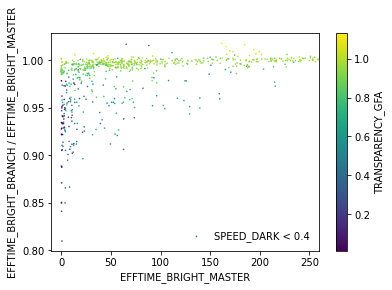

In [19]:
is_bright = sv1_exposures['SPEED_DARK'] < 1./2.5 

pl.scatter(master_efftime_bright[is_bright], branch_efftime_bright[is_bright] / master_efftime_bright[is_bright], c=sv1_exposures['TRANSPARENCY_GFA'][is_bright], marker='.', s=10, lw=0.0, label='SPEED_DARK < 0.4')
pl.xlim(-10.0, 260.)

pl.xlabel('EFFTIME_BRIGHT_MASTER')
pl.ylabel('EFFTIME_BRIGHT_BRANCH / EFFTIME_BRIGHT_MASTER')
pl.colorbar(label='TRANSPARENCY_GFA')

pl.legend(frameon=False)

In [20]:
dtsnrs    = tsnrs[tsnrs['SKY_MAG_AB_GFA'] > 20.07]
btsnrs    = tsnrs[tsnrs['SKY_MAG_AB_GFA'] < 20.07]

In [21]:
dtsnrs.dtype.names

('NIGHT',
 'EXPID',
 'TILEID',
 'SURVEY',
 'FAPRGRM',
 'FAFLAVOR',
 'EXPTIME',
 'EFFTIME_SPEC',
 'GOALTIME',
 'GOALTYPE',
 'MINTFRAC',
 'AIRMASS',
 'EBV',
 'SEEING_ETC',
 'EFFTIME_ETC',
 'TSNR2_ELG',
 'TSNR2_QSO',
 'TSNR2_LRG',
 'TSNR2_LYA',
 'TSNR2_BGS',
 'ELG_EFFTIME_DARK',
 'BGS_EFFTIME_BRIGHT',
 'LYA_EFFTIME_DARK',
 'TRANSPARENCY_GFA',
 'SEEING_GFA',
 'FIBER_FRACFLUX_GFA',
 'FIBER_FRACFLUX_ELG_GFA',
 'FIBER_FRACFLUX_BGS_GFA',
 'FIBERFAC_GFA',
 'FIBERFAC_ELG_GFA',
 'FIBERFAC_BGS_GFA',
 'AIRMASS_GFA',
 'SKY_MAG_AB_GFA',
 'SKY_MAG_G_SPEC',
 'SKY_MAG_R_SPEC',
 'SKY_MAG_Z_SPEC',
 'EFFTIME_GFA',
 'EFFTIME_DARK_GFA',
 'EFFTIME_BRIGHT_GFA',
 'EFFTIME_BACKUP_GFA')

In [42]:
np.unique(dtsnrs['FAPRGRM'])

backup
backup1
bgsmws
bright
dark
dithprec
elg
elgqso
lrgqso
lrgqso2
m31


In [25]:
flux_bright_nom = 15.8  # nMgy (r=19.5 mag for de Vaucouleurs rhalf=1.5" BGS)

In [26]:
fiber_diameter_arcsec=1.52

In [27]:
fiber_area_arcsec2 = np.pi*(fiber_diameter_arcsec/2)**2

In [28]:
fiber_fracflux_bgs_nominal = 0.195000
fiber_fracflux_bgs_fwhm2   = 0.108201

In [29]:
flux_bright_nom / fiber_area_arcsec2

8.707230266107848

In [30]:
fflux_bright = flux_bright_nom * fiber_fracflux_bgs_nominal / fiber_area_arcsec2
fflux_bright

1.6979099018910304

In [31]:
fflux_bright = flux_bright_nom * fiber_fracflux_bgs_fwhm2 / fiber_area_arcsec2
fflux_bright

0.9421310220231353

In [69]:
new_tsnrs = Table.read('/global/cscratch1/sd/mjwilson/trash/tsnr-fiberloss/tsnr-exposures-denali.fits', 'TSNR2_EXPID')

In [70]:
new_tsnrs = new_tsnrs['NIGHT', 'EXPID', 'TILEID', 'TSNR2_ELG', 'TSNR2_QSO', 'TSNR2_LRG', 'TSNR2_LYA', 'TSNR2_BGS']

In [71]:
new_tsnrs = join(new_tsnrs, tsnrs['EXPID', 'EFFTIME_BRIGHT_GFA', 'EFFTIME_DARK_GFA', 'TRANSPARENCY_GFA', 'EXPTIME', 'AIRMASS', 'EBV', 'SEEING_ETC', 'SEEING_GFA', 'SKY_MAG_AB_GFA', 'SKY_MAG_G_SPEC', 'SKY_MAG_R_SPEC', 'SKY_MAG_Z_SPEC'], join_type='left', keys='EXPID')

In [72]:
new_tsnrs = new_tsnrs[new_tsnrs['SEEING_ETC'] > 0.0]

In [73]:
new_dtsnrs = new_tsnrs[new_tsnrs['SKY_MAG_AB_GFA'] > 20.07]
new_btsnrs = new_tsnrs[new_tsnrs['SKY_MAG_AB_GFA'] < 20.07]

In [74]:
new_btsnrs

NIGHT,EXPID,TILEID,TSNR2_ELG,TSNR2_QSO,TSNR2_LRG,TSNR2_LYA,TSNR2_BGS,EFFTIME_BRIGHT_GFA,EFFTIME_DARK_GFA,TRANSPARENCY_GFA,EXPTIME,AIRMASS,EBV,SEEING_ETC,SEEING_GFA,SKY_MAG_AB_GFA,SKY_MAG_G_SPEC,SKY_MAG_R_SPEC,SKY_MAG_Z_SPEC
int32,int32,int32,float32,float32,float32,float64,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
20210224,77930,80662,7.3556604,6.952076,0.8789562,13.39526063078083,76.36394,190.14706188736972,151.8878697359652,1.021791751317354,991.953369140625,1.458041,0.023245688527822495,0.9334579706192017,0.9653356752889207,18.678060153852872,18.593451266384978,18.866860437172573,18.57203246023779
20210224,77931,80662,7.2558784,6.9543633,0.86990654,12.691440407792106,75.21907,196.6429767998814,158.34133334462177,1.0323322316503143,991.9509887695312,1.379708,0.023245688527822495,0.9334579706192017,0.9727498960156595,18.825828015833117,18.659063360061868,18.972623395982662,18.654747336235882
20210228,79060,80722,0.0025446282,0.031759385,0.00040800485,0.030955932280246796,0.03375661,1.5945363586070018,1.0537817050079554,0.8089644739594707,200.06298828125,1.205051,0.04240146651864052,2.72739839553833,3.3082598621808383,19.12577926598044,18.896188856375932,19.18669929660403,18.744386676537466
20210228,79061,80722,0.00769027,0.1497275,0.0013522494,0.15096787037570417,0.113354035,5.9357664169466915,4.343041348579258,0.8748326916696052,200.0511016845703,1.222354,0.04240146651864052,3.0991344451904297,2.17948522388015,19.225154367609825,18.869120175747376,19.166999397611878,18.79791749989532
20210228,79062,80722,0.0044803303,0.02931168,0.0006825224,0.029703379568369808,0.059586897,1.3083448498021517,0.951161005795352,0.8773546880266239,62.756004333496094,1.236726,0.04240146651864052,2.1686203479766846,2.170591007373656,19.207392721065865,18.84796811302744,19.146702972876884,18.782595195087385
20210228,79063,80729,0.4028577,2.5948095,0.058843367,3.618003140643446,4.8570204,79.15542918045325,59.7683704570198,0.9210897763028264,1195.7724609375,1.051392,0.01278962567448616,2.1686203479766846,1.82855883821007,19.220947273769198,18.892930115899244,19.201885821093686,18.936612562470486
20210304,79308,80738,0.020644652,0.17389254,0.0033888696,0.4420708903958762,0.30093026,9.836277645756294,6.981321105773913,0.6393548190994106,600.0559692382812,1.338357,0.027566010132431984,2.3561999797821045,2.74512677786956,19.67305742624675,20.127113582224393,19.774800550223944,18.811198331231175
20210304,79309,80738,0.045255885,0.37813404,0.0074343854,0.8559720081328932,0.65661967,18.661164761459382,13.821167012731003,0.7334298996268407,600.0722045898438,1.306263,0.027566010132431984,2.3561999797821045,2.471763642939571,19.87498450547393,20.294748068280235,20.003408285061468,18.903202791814312
20210304,79313,80736,0.05743283,0.48472342,0.009492184,1.1820026278211218,0.8463986,26.46957299039754,19.657515852489983,0.7701329235803596,600.0740966796875,1.120125,0.019631773233413696,2.3561999797821045,2.392440430349211,19.941353855108552,20.3597074548111,20.078503088191205,18.897442471936145


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


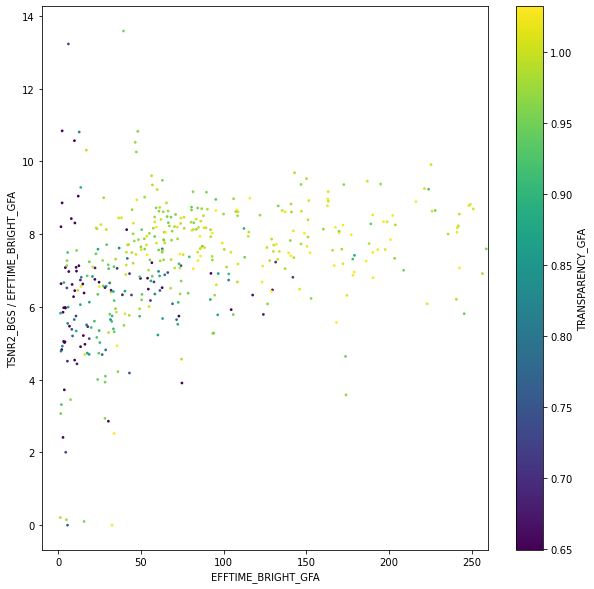

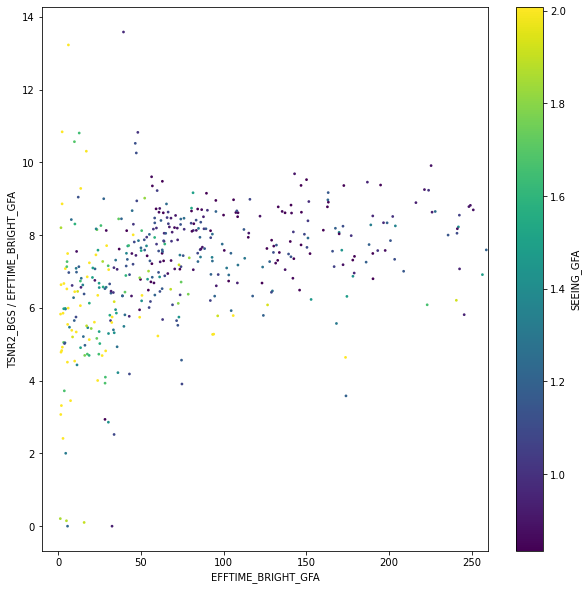

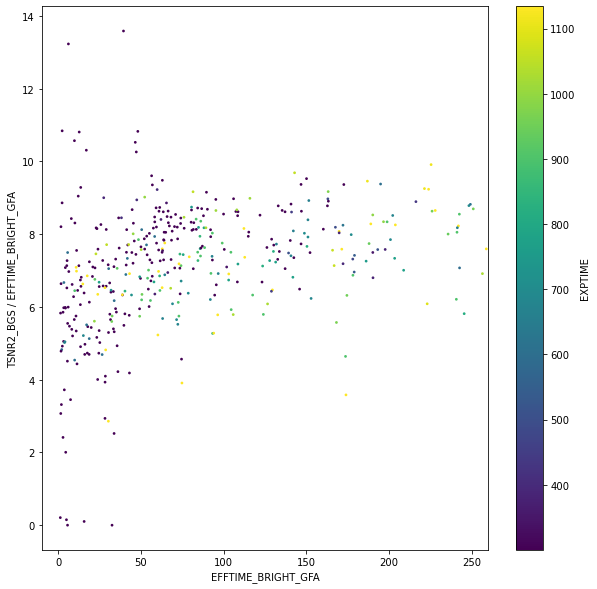

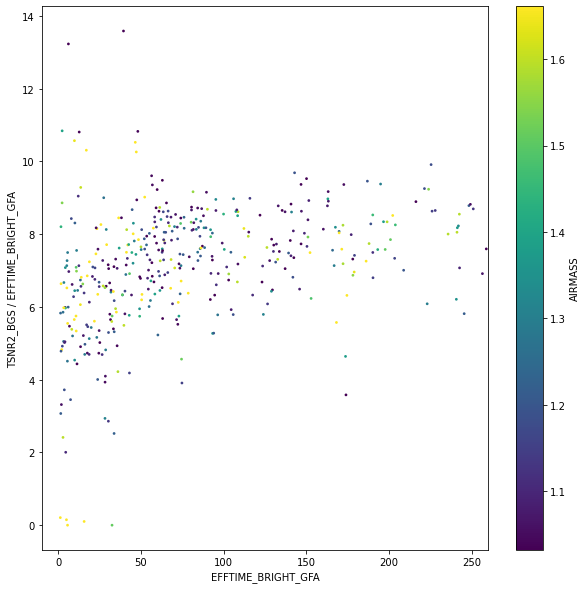

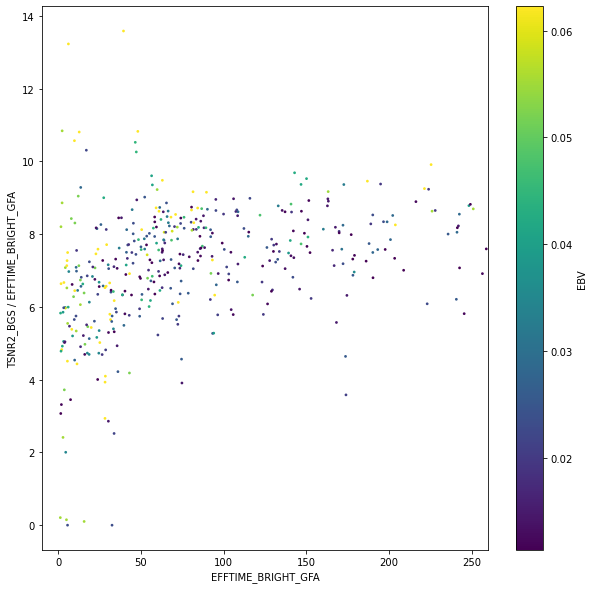

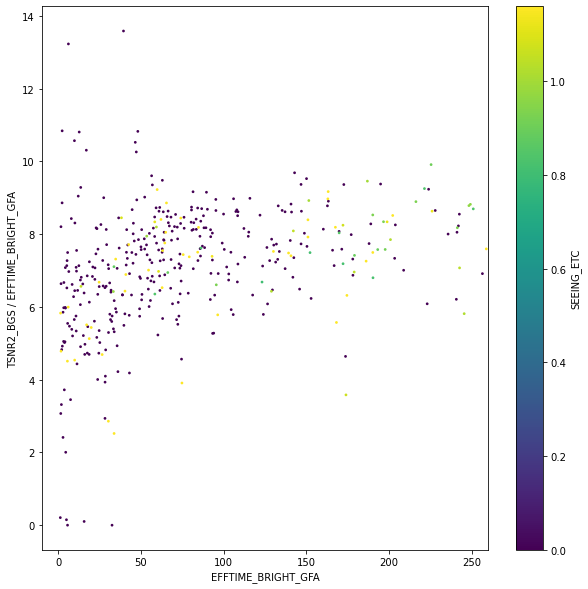

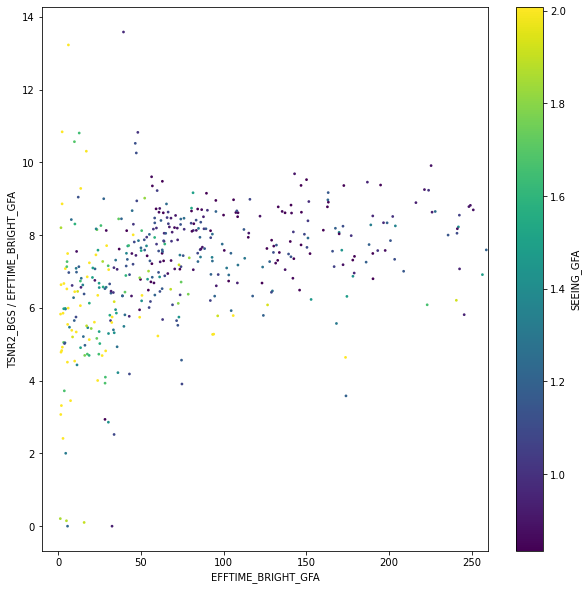

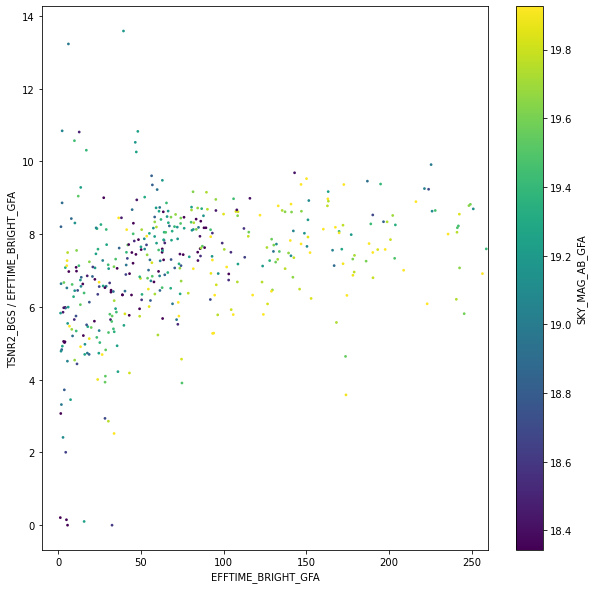

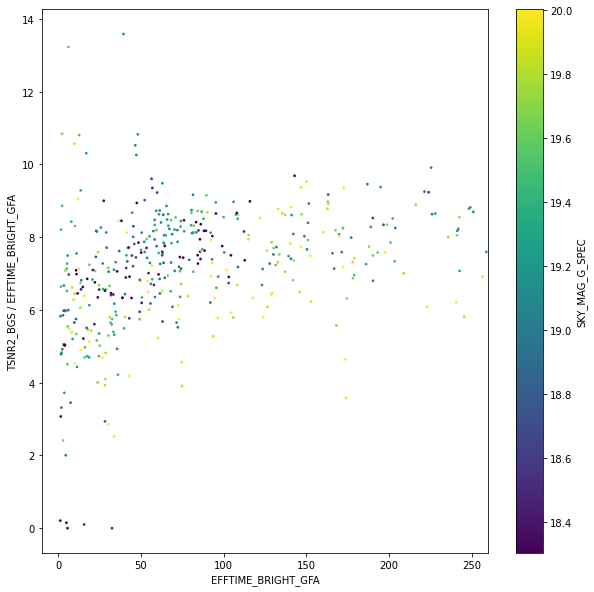

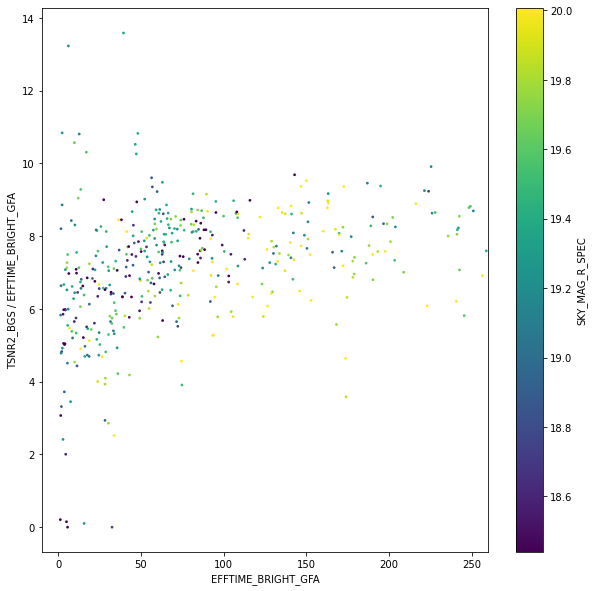

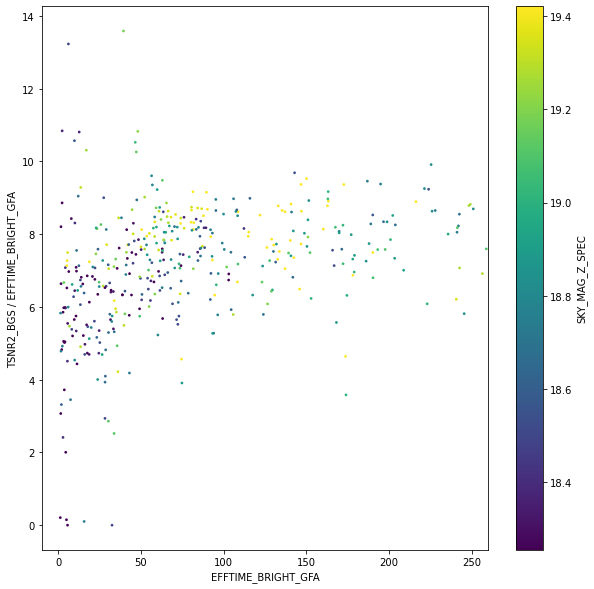

In [108]:
toplot    = btsnrs[(btsnrs['EFFTIME_BRIGHT_GFA'] > 1.0) & (btsnrs['TSNR2_BGS'] > 0.0)]

res       = stats.linregress(toplot['EFFTIME_BRIGHT_GFA'], toplot['TSNR2_BGS'])
slope     = res.slope
intercept = res.intercept

predict   = (slope * toplot['EFFTIME_BRIGHT_GFA'] + intercept)
rms       = np.std(toplot['TSNR2_BGS'] - predict)

for tt in ['TRANSPARENCY_GFA', 'SEEING_GFA', 'EXPTIME', 'AIRMASS', 'EBV', 'SEEING_ETC', 'SEEING_GFA', 'SKY_MAG_AB_GFA', 'SKY_MAG_G_SPEC', 'SKY_MAG_R_SPEC', 'SKY_MAG_Z_SPEC']:
    fig, axes = plt.subplots(1,1,figsize=(10,10)) 

    isin=np.isfinite(toplot[tt])

    label='y={:.2f}x + {:.2f} (rms: {:.2f})'.format(slope, intercept, rms)
    
    cm = axes.scatter(toplot['EFFTIME_BRIGHT_GFA'][isin], toplot['TSNR2_BGS'][isin] / toplot['EFFTIME_BRIGHT_GFA'][isin], marker='.', lw=0.0, label='', c=toplot[tt][isin], vmin=np.percentile(toplot[tt][isin], 10.), vmax=np.percentile(toplot[tt][isin], 90.), s=30)

    axes.set_xlabel('EFFTIME_BRIGHT_GFA')
    axes.set_ylabel('TSNR2_BGS / EFFTIME_BRIGHT_GFA')

    axes.set_xlim(-10.0,260.)
    axes.legend(frameon=False, loc=2)

    plt.colorbar(cm, label=tt)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


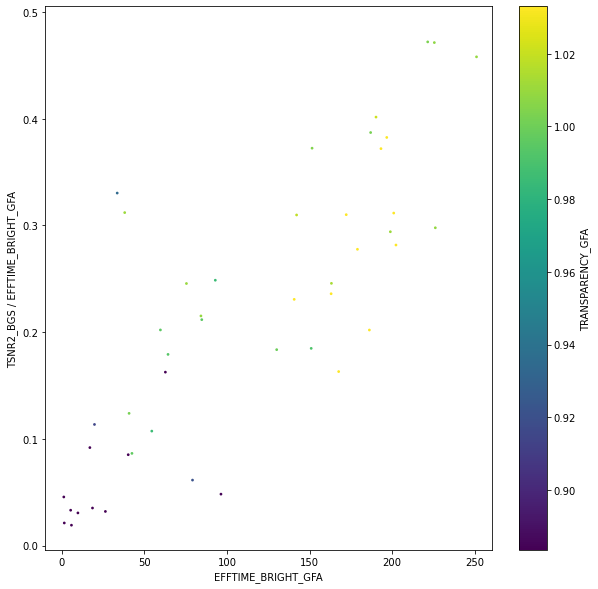

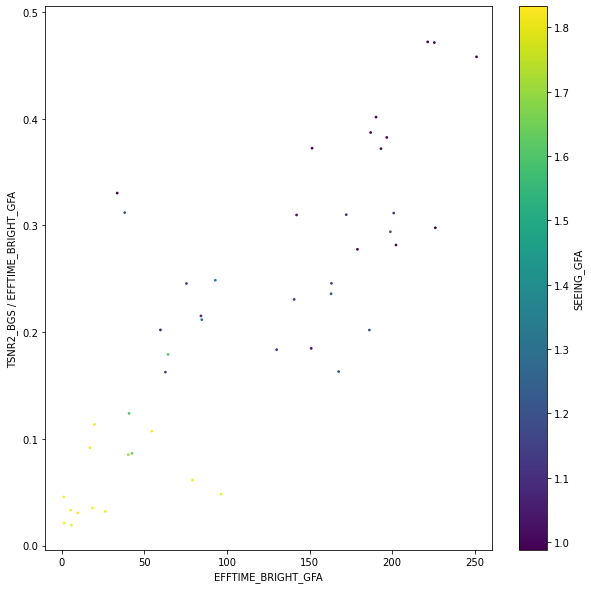

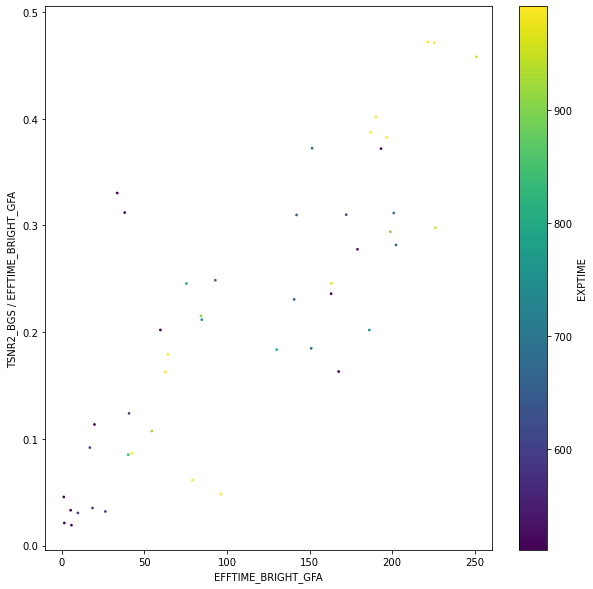

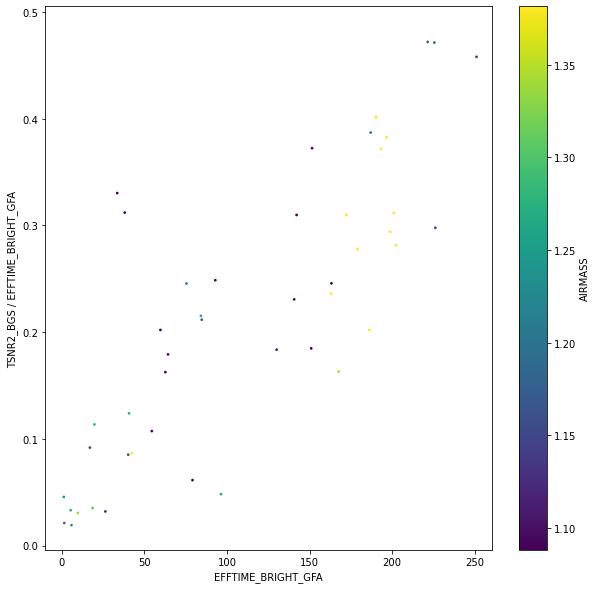

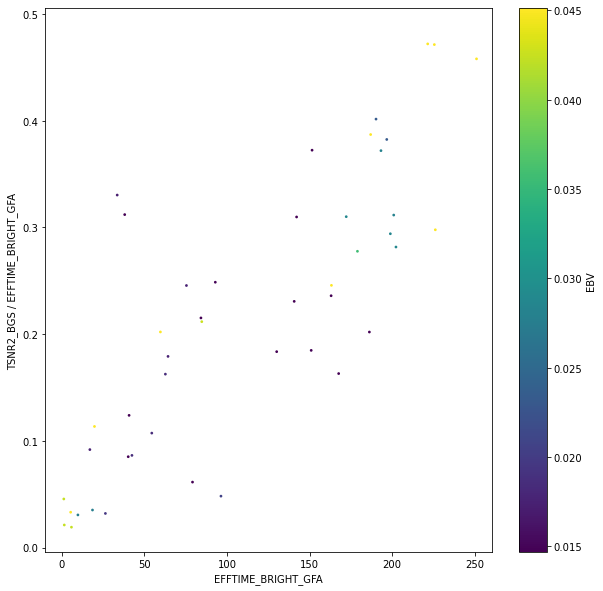

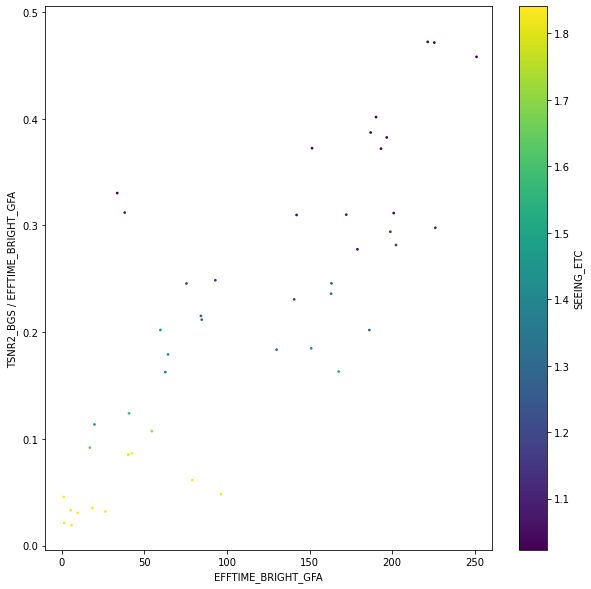

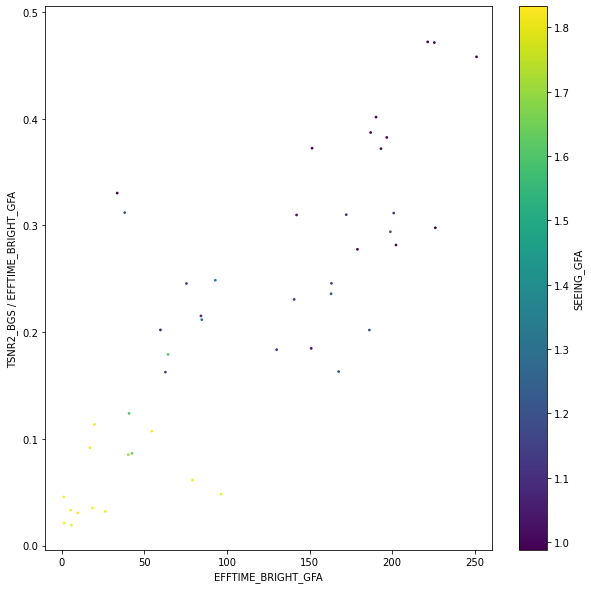

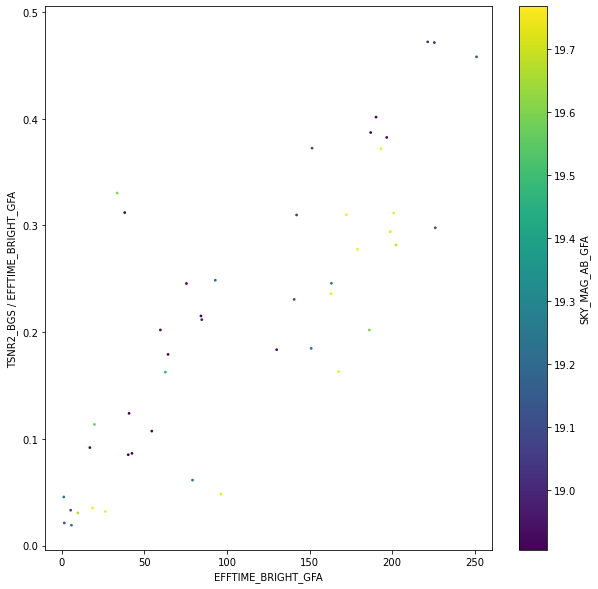

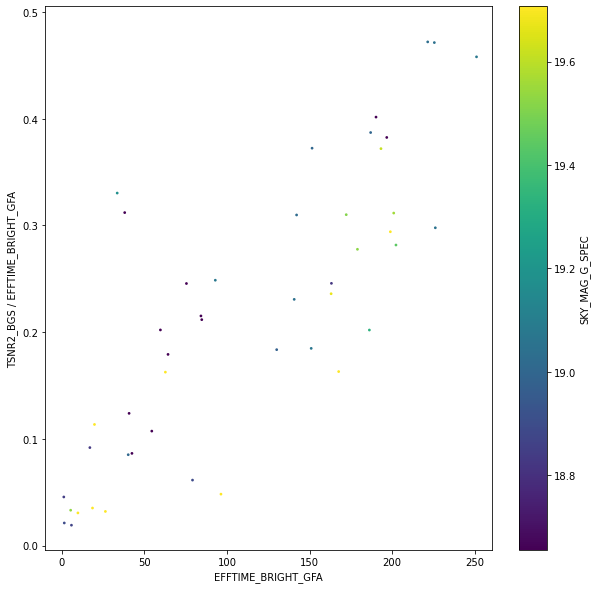

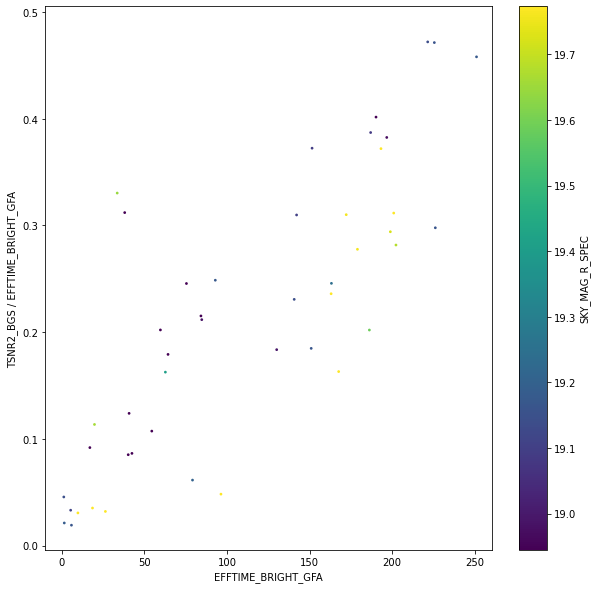

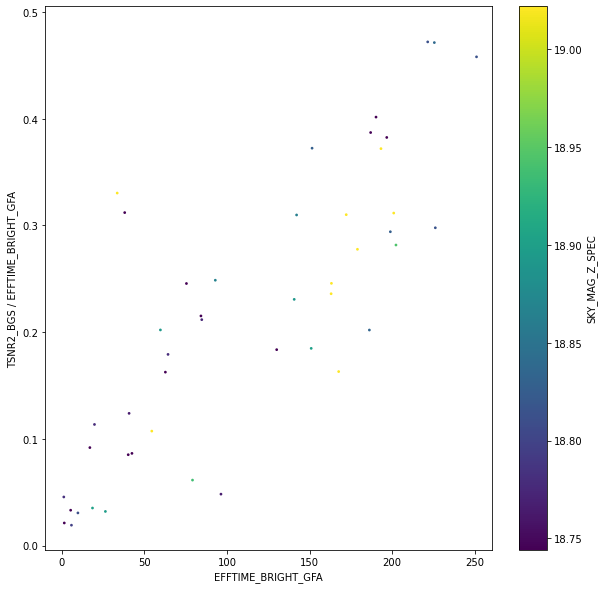

In [102]:
toplot    = new_btsnrs[(new_btsnrs['EFFTIME_BRIGHT_GFA'] > 0.0) & (new_btsnrs['TSNR2_BGS'] > 0.0)]

res       = stats.linregress(toplot['EFFTIME_BRIGHT_GFA'], toplot['TSNR2_BGS'])
slope     = res.slope
intercept = res.intercept

predict   = (slope * toplot['EFFTIME_BRIGHT_GFA'] + intercept)
rms       = np.std(toplot['TSNR2_BGS'] - predict)

for tt in ['TRANSPARENCY_GFA', 'SEEING_GFA', 'EXPTIME', 'AIRMASS', 'EBV', 'SEEING_ETC', 'SEEING_GFA', 'SKY_MAG_AB_GFA', 'SKY_MAG_G_SPEC', 'SKY_MAG_R_SPEC', 'SKY_MAG_Z_SPEC']:
    fig, axes = plt.subplots(1,1,figsize=(10,10)) 

    isin=np.isfinite(toplot[tt])

    label='y={:.2f}x + {:.2f} (rms: {:.2f})'.format(slope, intercept, rms)
    
    cm = axes.scatter(toplot['EFFTIME_BRIGHT_GFA'][isin], toplot['TSNR2_BGS'][isin] / toplot['EFFTIME_BRIGHT_GFA'][isin], marker='.', lw=0.0, label='', c=toplot[tt][isin], vmin=np.percentile(toplot[tt][isin], 20.), vmax=np.percentile(toplot[tt][isin], 80.), s=30)

    axes.set_xlabel('EFFTIME_BRIGHT_GFA')
    axes.set_ylabel('TSNR2_BGS / EFFTIME_BRIGHT_GFA')

    axes.set_xlim(-10.0,260.)
    axes.legend(frameon=False, loc=2)

    plt.colorbar(cm, label=tt)

In [77]:
matched = tsnrs[np.isin(tsnrs['EXPID'], new_tsnrs['EXPID'])]
matched.sort('EXPID')

In [78]:
new_matched = new_tsnrs[np.isin(new_tsnrs['EXPID'], tsnrs['EXPID'])]
new_matched.sort('EXPID')

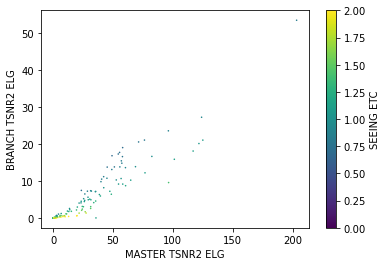

In [97]:
pl.scatter(matched['TSNR2_ELG'], new_matched['TSNR2_ELG'], c=matched['SEEING_ETC'], marker='.', lw=0.0, s=10, vmin=0.0, vmax=2.0)
pl.xlabel('MASTER TSNR2 ELG')
pl.ylabel('BRANCH TSNR2 ELG')
pl.colorbar(label='SEEING ETC')

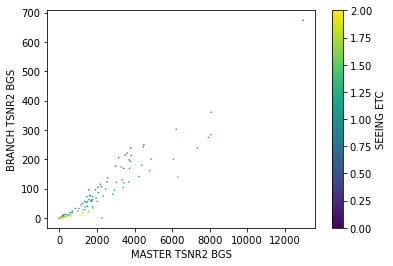

In [100]:
pl.scatter(matched['TSNR2_BGS'], new_matched['TSNR2_BGS'], c=matched['SEEING_ETC'], marker='.', lw=0.0, s=10, vmin=0.0, vmax=2.0)
pl.xlabel('MASTER TSNR2 BGS')
pl.ylabel('BRANCH TSNR2 BGS')
pl.colorbar(label='SEEING ETC')

# Done.